# GF($2^m$) Add Constant

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `GF2AddK`
In place addition of a constant $k$ for elements in GF($2^m$).

The bloq implements in place addition of a classical constant $k$ and a quantum register
$|x\rangle$ storing elements from GF($2^m$). Addition in GF($2^m$) simply reduces to a component
wise XOR, which can be implemented via X gates.

$$
|x\rangle  \rightarrow |x + k\rangle
$$

#### Parameters
 - `bitsize`: The degree $m$ of the galois field GF($2^m$). Also corresponds to the number of qubits in the input register x.
 - `k`: Integer representation of constant over GF($2^m$) that should be added to the input register x. 

#### Registers
 - `x`: Input THRU register of size $m$ that stores elements from $GF(2^m)$.


In [2]:
from qualtran.bloqs.gf_arithmetic import GF2AddK

### Example Instances

In [3]:
gf16_add_k = GF2AddK(4, 1)

In [4]:
import sympy

m, k = sympy.symbols('m, k', positive=True, integers=True)
gf2_add_k_symbolic = GF2AddK(m, k)

#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([gf16_add_k, gf2_add_k_symbolic],
           ['`gf16_add_k`', '`gf2_add_k_symbolic`'])

### Call Graph

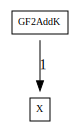

#### Counts totals:
 - `X`: 1

In [6]:
from qualtran.resource_counting.generalizers import ignore_split_join
gf16_add_k_g, gf16_add_k_sigma = gf16_add_k.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(gf16_add_k_g)
show_counts_sigma(gf16_add_k_sigma)